In [6]:
import numpy as np
import pandas as pd
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io

In [5]:
!pip install scipy

     -------------------------------------- 41.3/41.3 MB 157.8 kB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\mafig\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [7]:
# Definimos la ruta del archivo.mat
file_path=r"C:\Users\mafig\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\BCT\macaque47.mat"

# Leemos el contenido del archivo .mat
file_dict=scipy.io.loadmat(file_path)

In [9]:
file_dict

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jun 29 12:11:31 2007',
 '__version__': '1.0',
 '__globals__': [],
 'CIJ': array([[0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(47, 47), dtype=uint8),
 'Names': array(['1   ', '2   ', '35  ', '36  ', '46  ', '5   ', 'Id  ', 'VP  ',
        '3a  ', '3b  ', '4   ', '6   ', '7a  ', '7b  ', 'AITd', 'AITv',
        'CITd', 'CITv', 'DP  ', 'FEF ', 'FST ', 'Ig  ', 'LIP ', 'MDP ',
        'MIP ', 'MSTd', 'MSTl', 'MT  ', 'PIP ', 'PITd', 'PITv', 'PO  ',
        'Ri  ', 'SII ', 'SMA ', 'STPa', 'STPp', 'TF  ', 'TH  ', 'V1  ',
        'V2  ', 'V3  ', 'V3A ', 'V4  ', 'V4t ', 'VIP ', 'VOT '],
       dtype='<U4')}

In [10]:
matriz=file_dict['CIJ']
columnas=file_dict['Names']

In [14]:
np.shape(matriz), len(columnas)

((47, 47), 47)

In [16]:
macaco_df=pd.DataFrame(matriz, columnas, columnas)
macaco_df

,1,2,35,36,46,5,Id,VP,3a,3b,...,TF,TH,V1,V2,V3,V3A,V4,V4t,VIP,VOT
1,0,1,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
35,0,0,0,1,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
36,0,0,1,0,1,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
46,0,1,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
5,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
Id,0,0,1,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
VP,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,1,1,0,1,1
3a,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3b,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
macaco_df.columns = [columna.split(sep = ' ')[0] for columna in macaco_df.columns]
macaco_df.index = macaco_df.columns

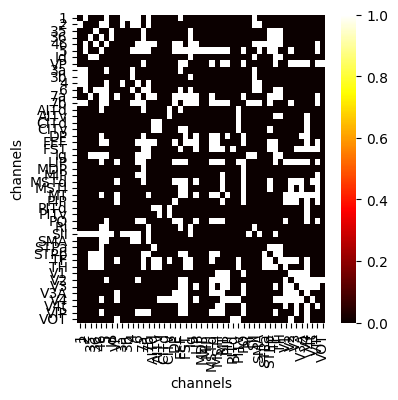

In [74]:
plt.figure(figsize=(4,4))
ax= sns. heatmap(macaco_df, annot=False, cmap='hot', fmt='2.f',
                xticklabels=macaco_df.columns, yticklabels=macaco_df.index)
ax.set(xlabel='channels',ylabel='channels')
plt.show()

# Actividad 
1. filtrar el dataframe para quedarse con las columnas 15 a 35 y las filas 15 a 35
2. Mostrar el mapa de calor
3. Crear el grafo dirigido
4. Calcular el grado del grafo

In [75]:
df_filt=macaco_df.iloc[15:35,15:35]

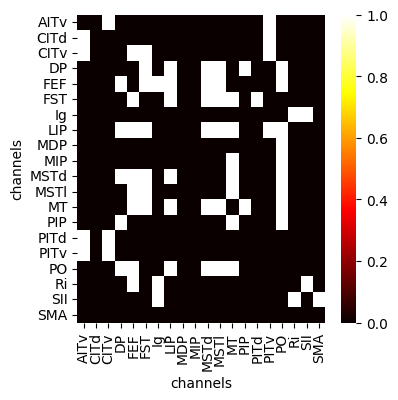

In [76]:
plt.figure(figsize=(4,4))
ax= sns. heatmap(df_filt, annot=False, cmap='hot', fmt='2.f',
                xticklabels=df_filt.columns, yticklabels=df_filt.index)
ax.set(xlabel='channels',ylabel='channels')
plt.show()

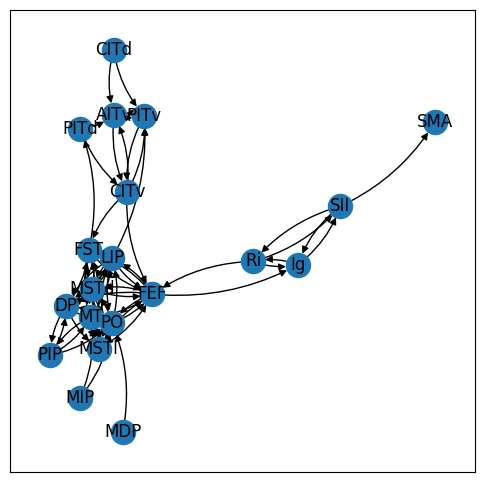

In [77]:
G=nx.from_pandas_adjacency(df_filt,create_using=nx.DiGraph())

plt.figure(figsize=(6,6))
pos=nx.spring_layout(G)
nx.draw_networkx(G,pos,with_labels=True,arrows=True, arrowstyle='-|>',connectionstyle='arc3,rad=0.15')



In [78]:
grado= sum(df_filt.values,1)
grado

array([ 5,  1,  4,  6,  9,  8,  4,  7,  1,  1,  7,  7,  8,  3,  2,  5, 10,
        3,  3,  2], dtype=uint8)

In [79]:
np.sum(df_filt,axis=1),np.sum(df_filt,axis=0)

(AITv    2
 CITd    2
 CITv    4
 DP      6
 FEF     7
 FST     6
 Ig      2
 LIP     8
 MDP     1
 MIP     2
 MSTd    6
 MSTl    4
 MT      7
 PIP     3
 PITd    2
 PITv    2
 PO      6
 Ri      3
 SII     3
 SMA     0
 dtype: uint64,
 AITv    4
 CITd    0
 CITv    3
 DP      5
 FEF     8
 FST     7
 Ig      3
 LIP     6
 MDP     0
 MIP     0
 MSTd    6
 MSTl    6
 MT      7
 PIP     2
 PITd    1
 PITv    4
 PO      9
 Ri      2
 SII     2
 SMA     1
 dtype: uint64)

In [80]:
coord_3D=r"C:\Users\mafig\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\BCT\macaco_M132_F99_LH.csv"

coord=pd.read_csv(coord_3D)
coord.set_index('region', inplace=True, drop=True)

In [65]:
macaco_df.columns = [columna.split(sep = ' ')[0] for columna in macaco_df.columns]
macaco_df.index = macaco_df.columns

In [81]:
pos3D={region:(coord.loc[region,'x'],
             coord.loc[region,'y'],
             coord.loc[region,'z']) for region in coord.index}

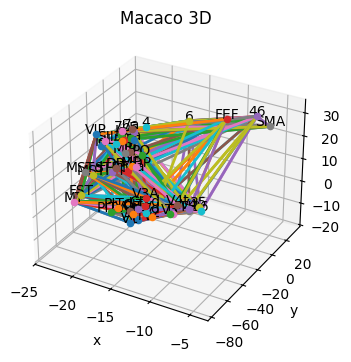

In [85]:

GG = nx.from_pandas_adjacency(macaco_df, create_using=nx.DiGraph());

fig= plt.figure(figsize=(4,4))
ax= fig.add_subplot(111, projection='3d')

for region, (x,y,z) in pos3D.items():
    ax.scatter(x,y,z)
    ax.text(x,y,z+0.03,region,fontsize=10, ha='center')

for i,j, data in GG.edges(data=True):
    x=[pos3D[i][0],pos3D[j][0]]
    y=[pos3D[i][1],pos3D[j][1]]
    z=[pos3D[i][2],pos3D[j][2]]
    ax.plot(x,y,z,linewidth=data['weight']*2)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Macaco 3D')
plt.show()

In [83]:
missing = [n for n in G.nodes if n not in pos3D]
print("Nodos sin coordenadas:", missing)

Nodos sin coordenadas: []


In [70]:
GG = nx.relabel_nodes(G, lambda n: n.strip())
pos3D = {k.strip(): v for k,v in pos3D.items()}